In [1]:
import re
import os
import numpy as np
from matplotlib import pyplot as plt

# ResNet

In [2]:
net_length = [18, 34, 50, 101]
nets = []
for l in net_length:
    nets.append('resnet' + str(l))
datasets = ['cifar10', 'cifar100']
regs = ['base', 'SO', 'DSO', 'SRIP', 'OCNN', 'EADK', 'EADC', 'MST']

In [3]:
data_dir = 'log/performance2/'
datafile_list = []
file_list = []
comparison_case = []
for d in datasets:
    for n in nets:
        comparison_case.append('_'.join([n, d]) + '_')
        for r in regs:
            filename = '_'.join([n, d, r])
            datafile_list.append(os.path.join(data_dir, filename + '.txt'))
            file_list.append(filename)

In [4]:
results = {}
for i, filename in enumerate(file_list):
    acc1 = []
    acc5 = []
    time = []
    loss = []
    try:
        with open(datafile_list[i], 'r') as f:

            while True:
                line = f.readline()
                if not line: break
                if line.startswith('epoch'):
                    sp = re.split(' |,', line)
                    for i, v in enumerate(sp):
                        if v == 'tr_time:':
                            time.append(float(sp[i+1]))
                        elif v == 'loss:':
                            loss.append(float(sp[i+1]))
                        elif v == 'acc1:':
                            acc1.append(float(sp[i+1]))
                        elif v == 'acc5:':
                            acc5.append(float(sp[i+1]))  
    except:
        print(datafile_list[i]+ ' do not exists')

    if len(acc1) == 200:
        print(filename, ' is OK' )
        results[filename] = {'acc1': acc1, 'acc5': acc5, 'time': time, 'loss': loss}
    else:
        print(filename+' length is ', len(acc1))
    

resnet18_cifar10_base  is OK
resnet18_cifar10_SO  is OK
resnet18_cifar10_DSO  is OK
resnet18_cifar10_SRIP  is OK
resnet18_cifar10_OCNN  is OK
resnet18_cifar10_EADK  is OK
resnet18_cifar10_EADC  is OK
resnet18_cifar10_MST  is OK
resnet34_cifar10_base  is OK
resnet34_cifar10_SO  is OK
resnet34_cifar10_DSO  is OK
resnet34_cifar10_SRIP  is OK
resnet34_cifar10_OCNN  is OK
resnet34_cifar10_EADK  is OK
resnet34_cifar10_EADC  is OK
resnet34_cifar10_MST  is OK
resnet50_cifar10_base  is OK
resnet50_cifar10_SO  is OK
resnet50_cifar10_DSO  is OK
resnet50_cifar10_SRIP  is OK
resnet50_cifar10_OCNN  is OK
resnet50_cifar10_EADK  is OK
resnet50_cifar10_EADC  is OK
resnet50_cifar10_MST  is OK
resnet101_cifar10_base  is OK
resnet101_cifar10_SO  is OK
resnet101_cifar10_DSO  is OK
resnet101_cifar10_SRIP  is OK
resnet101_cifar10_OCNN  is OK
resnet101_cifar10_EADK  is OK
resnet101_cifar10_EADC  is OK
log/performance2/resnet101_cifar10_MST.txt do not exists
resnet101_cifar10_MST length is  0
resnet18_cifar100

In [5]:
len(results)

62

# ResNet ACC graph

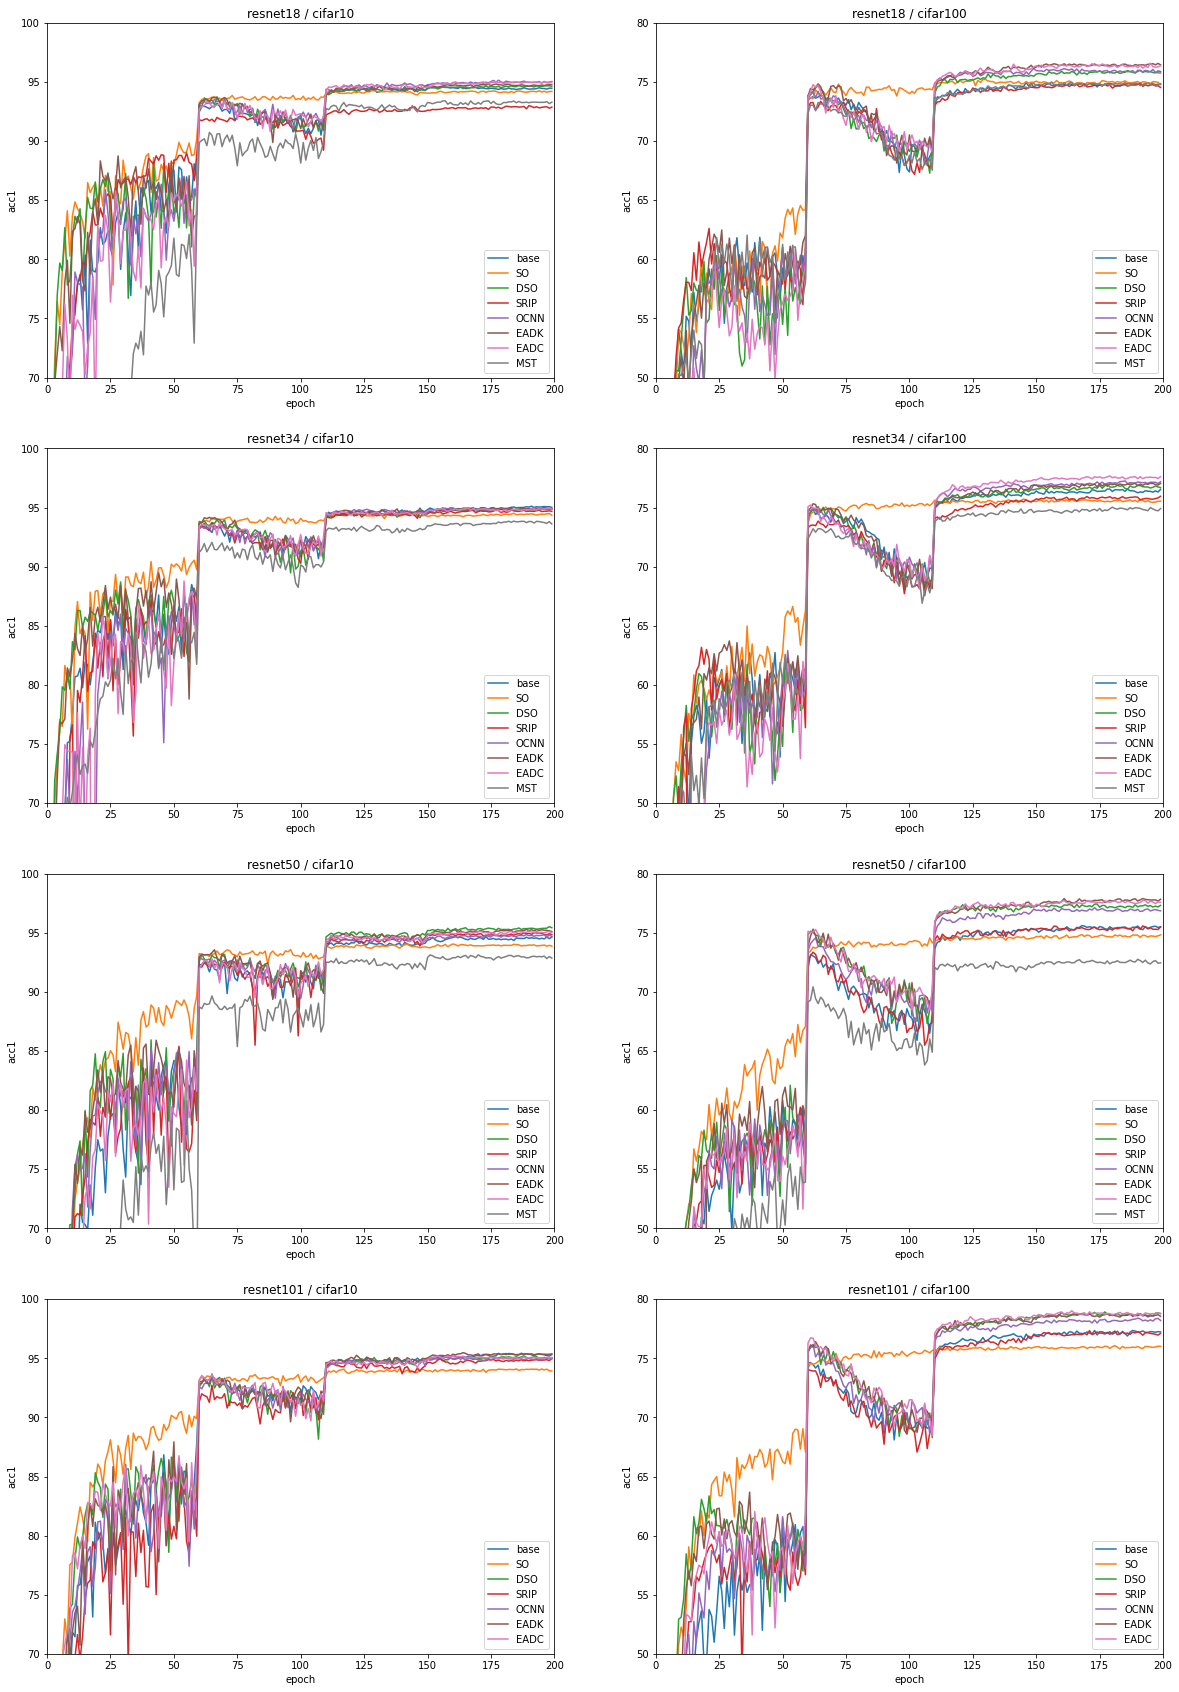

In [6]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(20, 30))
for i, comp in enumerate(comparison_case):
    tit = ' / '.join(comp.split('_')[:2])
    axs1 = axs[i%4, i//4]
    axs1.set_title(tit)
    axs1.set_xlim(0, 200)
    if '100_' in comp:
        axs1.set_ylim(50, 80)
    else:
        axs1.set_ylim(70, 100)
    axs1.set_xlabel('epoch')
    axs1.set_ylabel('acc1')
    for f in results:
        if f.startswith(comp):
            axs1.plot(range(200), results[f]['acc1'], label=f.split('_')[-1])
    axs1.legend(loc=4)
fig.show()

# ResNet Table Acc1/5, loss, time

In [7]:
acc1_dic = {}
acc5_dic = {}
loss_dic = {}
time_dic = {}
for fn in file_list:
    try:
        acc1_dic[fn] = sum(results[fn]['acc1'][-5:])/5
        acc5_dic[fn] = sum(results[fn]['acc5'][-5:])/5
        loss_dic[fn] = sum(results[fn]['loss'][-5:])/5
        time_dic[fn] = sum(results[fn]['time'][10:15])/5
    except:
        pass

In [9]:
table = "    base & {:.2f} & {:.2f} & {:.2f} & {:.2f} & {:.2f} & {:.2f} & {:.2f} & {:.2f} \\\\\n    SO & {:.2f} & {:.2f} & {:.2f} & {:.2f} & {:.2f} & {:.2f} & {:.2f} & {:.2f} \\\\\n    DSO & {:.2f} & {:.2f} & {:.2f} & {:.2f} & {:.2f} & {:.2f} & {:.2f} & {:.2f} \\\\\n    SRIP & {:.2f} & {:.2f} & {:.2f} & {:.2f} & {:.2f} & {:.2f} & {:.2f} & {:.2f} \\\\\n    OCNN & {:.2f} & {:.2f} & {:.2f} & {:.2f} & {:.2f} & {:.2f} & {:.2f} & {:.2f} \\\\\n    MST & {:.2f} & {:.2f} & {:.2f} & {} & {:.2f} & {:.2f} & {:.2f} & {} \\\\\n    ADK & {:.2f} & {:.2f} & {:.2f} & {:.2f} & {:.2f} & {:.2f} & {:.2f} & {:.2f} \\\\\n    ADC & {:.2f} & {:.2f} & {:.2f} & {:.2f} & {:.2f} & {:.2f} & {:.2f} & {:.2f} \\\\\n"
insert_data = []

for r in ['base', 'SO', 'DSO', 'SRIP', 'OCNN', 'MST', 'EADK', 'EADC']:
    for d in ['cifar10', 'cifar100']:
        for m in ['resnet18', 'resnet34', 'resnet50', 'resnet101']:
            fn = '_'.join([m, d, r])
            try:
                insert_data.append(acc1_dic[fn])
            except:
                insert_data.append('-')

table_acc1 = table.format(*insert_data)

In [10]:
table = "    base & {:.1f} & {:.1f} & {:.1f} & {:.1f} & {:.1f} & {:.1f} & {:.1f} & {:.1f} \\\\\n    SO & {:.1f} & {:.1f} & {:.1f} & {:.1f} & {:.1f} & {:.1f} & {:.1f} & {:.1f} \\\\\n    DSO & {:.1f} & {:.1f} & {:.1f} & {:.1f} & {:.1f} & {:.1f} & {:.1f} & {:.1f} \\\\\n    SRIP & {:.1f} & {:.1f} & {:.1f} & {:.1f} & {:.1f} & {:.1f} & {:.1f} & {:.1f} \\\\\n    OCNN & {:.1f} & {:.1f} & {:.1f} & {:.1f} & {:.1f} & {:.1f} & {:.1f} & {:.1f} \\\\\n    MST & {:.1f} & {:.1f} & {:.1f} & {} & {:.1f} & {:.1f} & {:.1f} & {} \\\\\n    ADK & {:.1f} & {:.1f} & {:.1f} & {:.1f} & {:.1f} & {:.1f} & {:.1f} & {:.1f} \\\\\n    ADC & {:.1f} & {:.1f} & {:.1f} & {:.1f} & {:.1f} & {:.1f} & {:.1f} & {:.1f} \\\\\n"
insert_data = []

for r in ['base', 'SO', 'DSO', 'SRIP', 'OCNN', 'MST', 'EADK', 'EADC']:
    for d in ['cifar10', 'cifar100']:
        for m in ['resnet18', 'resnet34', 'resnet50', 'resnet101']:
            fn = '_'.join([m, d, r])
            try:
                insert_data.append(time_dic[fn])
            except:
                insert_data.append('-')

table_time = table.format(*insert_data)

In [11]:
print(table_acc1)

    base & 94.46 & 95.06 & 94.57 & 95.28 & 74.84 & 76.39 & 75.51 & 77.25 \\
    SO & 94.19 & 94.43 & 93.93 & 94.02 & 74.94 & 75.48 & 74.75 & 75.98 \\
    DSO & 94.67 & 94.87 & 95.43 & 95.04 & 75.86 & 76.72 & 77.26 & 78.75 \\
    SRIP & 92.87 & 94.68 & 94.89 & 94.88 & 74.69 & 75.79 & 75.37 & 77.06 \\
    OCNN & 95.00 & 94.89 & 94.76 & 94.96 & 75.86 & 77.12 & 76.91 & 78.27 \\
    MST & 93.28 & 93.71 & 92.94 & - & 74.79 & 74.85 & 72.51 & - \\
    ADK & 94.76 & 94.91 & 95.20 & 95.35 & 76.51 & 76.99 & 77.79 & 78.61 \\
    ADC & 94.97 & 94.89 & 95.06 & 95.04 & 76.37 & 77.54 & 77.60 & 78.78 \\



In [12]:
print(table_time)

    base & 12.1 & 22.7 & 40.9 & 68.7 & 12.1 & 22.6 & 40.6 & 68.7 \\
    SO & 13.8 & 25.6 & 42.2 & 71.5 & 13.8 & 25.8 & 42.3 & 70.9 \\
    DSO & 102.4 & 212.1 & 149.2 & 264.5 & 107.5 & 212.2 & 149.2 & 211.8 \\
    SRIP & 58.7 & 107.2 & 85.4 & 144.9 & 47.7 & 105.9 & 89.3 & 144.6 \\
    OCNN & 23.0 & 43.6 & 50.6 & 86.7 & 22.9 & 44.1 & 50.1 & 86.4 \\
    MST & 70.2 & 121.1 & 91.7 & - & 69.6 & 121.1 & 91.9 & - \\
    ADK & 15.5 & 28.8 & 43.8 & 75.7 & 15.2 & 28.9 & 43.4 & 75.6 \\
    ADC & 42.6 & 85.0 & 66.4 & 122.0 & 42.9 & 82.8 & 69.7 & 125.3 \\



In [38]:
tt0 = [0 if isinstance(t, str) else t for t in insert_data]
tt = np.array(tt0)

tt = tt.reshape(8, 8)

tt = tt.transpose()

tt

array([[ 12.14,  13.78, 102.36,  58.7 ,  23.04,  70.2 ,  15.48,  42.56],
       [ 22.72,  25.56, 212.12, 107.22,  43.62, 121.12,  28.8 ,  84.96],
       [ 40.94,  42.24, 149.16,  85.4 ,  50.56,  91.74,  43.82,  66.36],
       [ 68.72,  71.46, 264.46, 144.86,  86.74,   0.  ,  75.7 , 122.02],
       [ 12.14,  13.8 , 107.54,  47.74,  22.92,  69.58,  15.16,  42.88],
       [ 22.6 ,  25.78, 212.16, 105.88,  44.06, 121.08,  28.92,  82.8 ],
       [ 40.64,  42.28, 149.22,  89.26,  50.1 ,  91.86,  43.44,  69.66],
       [ 68.66,  70.88, 211.78, 144.56,  86.38,   0.  ,  75.62, 125.26]])

In [39]:
base_tt = tt[:, [0]]

base_tt

array([[12.14],
       [22.72],
       [40.94],
       [68.72],
       [12.14],
       [22.6 ],
       [40.64],
       [68.66]])

In [40]:
rett = tt/base_tt
rett

array([[1.        , 1.13509061, 8.43163097, 4.83525535, 1.89785832,
        5.78253707, 1.27512356, 3.50576606],
       [1.        , 1.125     , 9.33626761, 4.71919014, 1.91989437,
        5.33098592, 1.26760563, 3.73943662],
       [1.        , 1.03175379, 3.64338056, 2.08597948, 1.23497802,
        2.24084025, 1.07034685, 1.62090865],
       [1.        , 1.03987194, 3.8483702 , 2.10797439, 1.26222352,
        0.        , 1.10157159, 1.77561118],
       [1.        , 1.13673806, 8.8583196 , 3.9324547 , 1.88797364,
        5.73146623, 1.24876442, 3.53212521],
       [1.        , 1.14070796, 9.38761062, 4.68495575, 1.94955752,
        5.35752212, 1.27964602, 3.66371681],
       [1.        , 1.04035433, 3.67175197, 2.19635827, 1.23277559,
        2.26033465, 1.06889764, 1.7140748 ],
       [1.        , 1.03233324, 3.08447422, 2.10544713, 1.25808331,
        0.        , 1.10136906, 1.82435188]])

In [41]:
for i in range(len(rett)):
    for j in range(len(rett[0])):
        print(f'{rett[i, j]/rett[i, 0]:.2f}', end='  ')
    print()

1.00  1.14  8.43  4.84  1.90  5.78  1.28  3.51  
1.00  1.13  9.34  4.72  1.92  5.33  1.27  3.74  
1.00  1.03  3.64  2.09  1.23  2.24  1.07  1.62  
1.00  1.04  3.85  2.11  1.26  0.00  1.10  1.78  
1.00  1.14  8.86  3.93  1.89  5.73  1.25  3.53  
1.00  1.14  9.39  4.68  1.95  5.36  1.28  3.66  
1.00  1.04  3.67  2.20  1.23  2.26  1.07  1.71  
1.00  1.03  3.08  2.11  1.26  0.00  1.10  1.82  


In [42]:
np.mean(rett, axis=0)

array([1.        , 1.08523124, 6.28272572, 3.3334519 , 1.58041804,
       3.33796078, 1.1766656 , 2.6719989 ])

In [43]:
np.mean([5.78, 5.33, 2.24, 5.73, 5.36, 2.26])

4.449999999999999

In [44]:
tt.shape

(8, 8)

In [45]:
base_tt.shape

(8, 1)

In [46]:
rettt = rett.transpose()

In [47]:
rettt

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        ],
       [1.13509061, 1.125     , 1.03175379, 1.03987194, 1.13673806,
        1.14070796, 1.04035433, 1.03233324],
       [8.43163097, 9.33626761, 3.64338056, 3.8483702 , 8.8583196 ,
        9.38761062, 3.67175197, 3.08447422],
       [4.83525535, 4.71919014, 2.08597948, 2.10797439, 3.9324547 ,
        4.68495575, 2.19635827, 2.10544713],
       [1.89785832, 1.91989437, 1.23497802, 1.26222352, 1.88797364,
        1.94955752, 1.23277559, 1.25808331],
       [5.78253707, 5.33098592, 2.24084025, 0.        , 5.73146623,
        5.35752212, 2.26033465, 0.        ],
       [1.27512356, 1.26760563, 1.07034685, 1.10157159, 1.24876442,
        1.27964602, 1.06889764, 1.10136906],
       [3.50576606, 3.73943662, 1.62090865, 1.77561118, 3.53212521,
        3.66371681, 1.7140748 , 1.82435188]])

# Performance VS Speed

In [51]:
acc_time = {}
for d in ['cifar10', 'cifar100']:
    acc_time[d] = {}
    for i, r in enumerate(['base', 'SO', 'DSO', 'SRIP', 'OCNN', 'MST', 'EADK', 'EADC']):
        acc_time[d][r] = {}
        acc_time[d][r]['acc'] = []
        acc_time[d][r]['time'] = []  
        for m in ['resnet18', 'resnet34', 'resnet50', 'resnet101']:
            fn = '_'.join([m, d, r])
            try:
                acc_time[d][r]['acc'].append(acc1_dic[fn])
            except:
                pass   
        if d == 'cifar10':
            if i != 5:
                acc_time[d][r]['time'] = rettt[i, :4]
            else:
                acc_time[d][r]['time'] = rettt[i, :3]
        elif d == 'cifar100':
            if i != 5:
                acc_time[d][r]['time'] = rettt[i, 4:]
            else:
                acc_time[d][r]['time'] = rettt[i, 4:-1]

In [52]:
acc_time

{'cifar10': {'base': {'acc': [94.458, 95.056, 94.572, 95.282],
   'time': array([1., 1., 1., 1.])},
  'SO': {'acc': [94.18999999999998, 94.42999999999999, 93.926, 94.018],
   'time': array([1.13509061, 1.125     , 1.03175379, 1.03987194])},
  'DSO': {'acc': [94.66600000000001, 94.872, 95.42799999999998, 95.042],
   'time': array([8.43163097, 9.33626761, 3.64338056, 3.8483702 ])},
  'SRIP': {'acc': [92.868, 94.684, 94.89399999999999, 94.878],
   'time': array([4.83525535, 4.71919014, 2.08597948, 2.10797439])},
  'OCNN': {'acc': [94.996, 94.888, 94.758, 94.958],
   'time': array([1.89785832, 1.91989437, 1.23497802, 1.26222352])},
  'MST': {'acc': [93.28, 93.712, 92.944],
   'time': array([5.78253707, 5.33098592, 2.24084025])},
  'EADK': {'acc': [94.75800000000001, 94.908, 95.20400000000001, 95.352],
   'time': array([1.27512356, 1.26760563, 1.07034685, 1.10157159])},
  'EADC': {'acc': [94.966, 94.888, 95.06, 95.04400000000001],
   'time': array([3.50576606, 3.73943662, 1.62090865, 1.7756

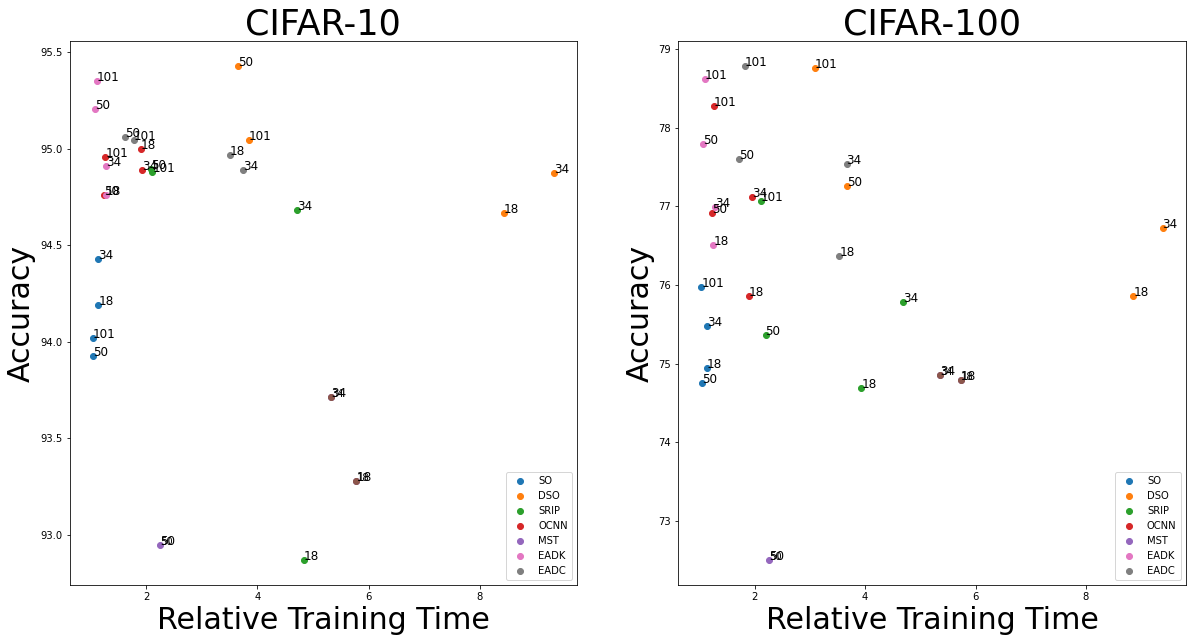

In [93]:
fig, ax = plt.subplots(ncols=2, figsize=(20, 10))
m = [18, 34, 50, 101]
ax[0].set_title('CIFAR-10', fontsize=35)
ax[0].set_xlabel('Relative Training Time', fontsize=30)
ax[0].set_ylabel('Accuracy', fontsize=30)
ax[1].set_title('CIFAR-100', fontsize=35)
ax[1].set_ylabel('Accuracy', fontsize=30)
ax[1].set_xlabel('Relative Training Time', fontsize=30)
for r in ['SO', 'DSO', 'SRIP', 'OCNN', 'MST', 'EADK', 'EADC']:
    try:
        ax[0].scatter(acc_time['cifar10'][r]['time'], acc_time['cifar10'][r]['acc'], label=r)
        for i, n in enumerate(m):
            ax[0].annotate('_'.join([str(n)]), (acc_time['cifar10'][r]['time'][i], acc_time['cifar10'][r]['acc'][i]), fontsize=12)
    except:
        ax[0].scatter(acc_time['cifar10'][r]['time'][:-1], acc_time['cifar10'][r]['acc'][:-1])
        for i, n in enumerate(m[:-1]):
            ax[0].annotate('_'.join([str(n)]), (acc_time['cifar10'][r]['time'][i], acc_time['cifar10'][r]['acc'][i]))
            
    try: 
        ax[1].scatter(acc_time['cifar100'][r]['time'], acc_time['cifar100'][r]['acc'], label=r)
        for i, n in enumerate(m):
            ax[1].annotate('_'.join([str(n)]), (acc_time['cifar100'][r]['time'][i], acc_time['cifar100'][r]['acc'][i]), fontsize=12)
    except:
        ax[1].scatter(acc_time['cifar100'][r]['time'][:-1], acc_time['cifar100'][r]['acc'][:-1])   
        for i, n in enumerate(m[:-1]):
            ax[1].annotate('_'.join([str(n)]), (acc_time['cifar100'][r]['time'][i], acc_time['cifar100'][r]['acc'][i]))

ax[0].legend(loc='lower right')
ax[1].legend(loc='lower right')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x7f02b6c906a0>] instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x7f02b6822898>] instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x7f02b6822ba8>] instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
/usr/local/lib/pyth

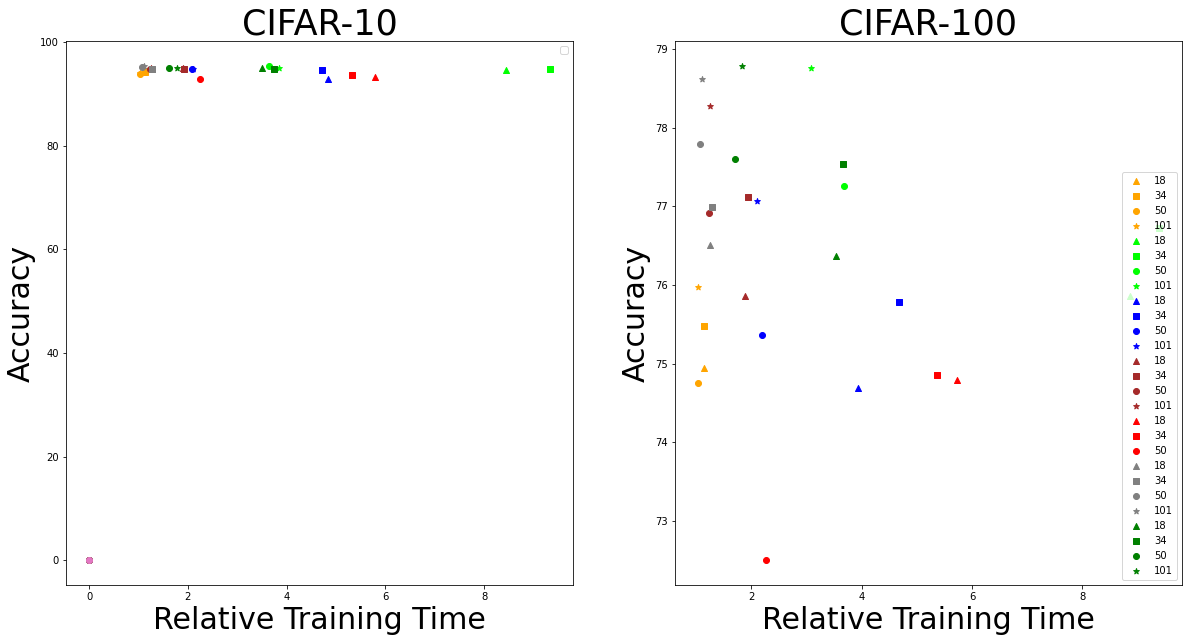

In [92]:
reg_list = ['SO', 'DSO', 'SRIP', 'OCNN', 'MST', 'EADK', 'EADC']

fig, ax = plt.subplots(ncols=2, figsize=(20, 10))
m = [18, 34, 50, 101]
m = [str(n) for n in m]
markers = ["^", "s", "o", "*"]
clrs = ["orange", "lime", "blue", "brown", "red", "grey", "green"]
ax[0].set_title('CIFAR-10', fontsize=35)
ax[0].set_xlabel('Relative Training Time', fontsize=30)
ax[0].set_ylabel('Accuracy', fontsize=30)
ax[1].set_title('CIFAR-100', fontsize=35)
ax[1].set_ylabel('Accuracy', fontsize=30)
ax[1].set_xlabel('Relative Training Time', fontsize=30)

legend_list = (ax[0].plot((0,), (0,), marker="o"), ax[0].plot((0,), (0,), marker="o"), ax[0].plot((0,), (0,), marker="o"), ax[0].plot((0,), (0,), marker="o"), ax[0].plot((0,), (0,), marker="o"), ax[0].plot((0,), (0,), marker="o"), ax[0].plot((0,), (0,), marker="o")) 



for j, r in enumerate(reg_list):
    at = acc_time['cifar10'][r]['time']
    aa = acc_time['cifar10'][r]['acc']
    for i, n in enumerate(m):
        try:
            ax[0].scatter(at[i], aa[i], label=m[i], marker=markers[i], color=clrs[j])
        except:
            pass
        
    at = acc_time['cifar100'][r]['time']
    aa = acc_time['cifar100'][r]['acc']
    for i, n in enumerate(m):
        try:
            ax[1].scatter(at[i], aa[i], label=m[i], marker=markers[i], color=clrs[j])
        except:
            pass
        
ax[0].legend(legend_list, tuple(reg_list))

# ax[0].legend(loc='lower right')
ax[1].legend(loc='lower right')
plt.show()

# Wide ResNet

In [14]:
datasets = ['cifar10', 'cifar100', 'svhn']
# regs = ['base', 'SO', 'DSO', 'SRIP', 'OCNN', 'ADK', 'ADC']
regs = ['base', 'SO', 'DSO', 'SRIP', 'OCNN', 'EADK', 'EADC']

In [15]:
data_dir = 'log/performance2/'
datafile_list = []
file_list = []
comparison_case = []
for d in datasets:
    comparison_case.append('_'.join(['wideResnet', d]) + '_')
    for r in regs:
        filename = '_'.join(['wideResnet', d, r])
        datafile_list.append(os.path.join(data_dir, filename + '.txt'))
        file_list.append(filename)

In [16]:
results = {}
for i, filename in enumerate(file_list):
    acc1 = []
    acc5 = []
    time = []
    loss = []
    try:
        with open(datafile_list[i], 'r') as f:

            while True:
                line = f.readline()
                if not line: break
                if line.startswith('epoch'):
                    sp = re.split(' |,', line)
                    for i, v in enumerate(sp):
                        if v == 'tr_time:':
                            time.append(float(sp[i+1]))
                        elif v == 'loss:':
                            loss.append(float(sp[i+1]))
                        elif v == 'acc1:':
                            acc1.append(float(sp[i+1]))
                        elif v == 'acc5:':
                            acc5.append(float(sp[i+1]))  
    except:
        print(datafile_list[i]+ ' do not exists')
    if len(acc1) == 200:
        print(filename, ' is OK' )
        results[filename] = {'acc1': acc1, 'acc5': acc5, 'time': time, 'loss': loss}
    else:
        print(filename+' length is ', len(acc1))

wideResnet_cifar10_base  is OK
wideResnet_cifar10_SO  is OK
wideResnet_cifar10_DSO  is OK
wideResnet_cifar10_SRIP  is OK
wideResnet_cifar10_OCNN  is OK
wideResnet_cifar10_EADK  is OK
wideResnet_cifar10_EADC  is OK
wideResnet_cifar100_base  is OK
wideResnet_cifar100_SO  is OK
wideResnet_cifar100_DSO  is OK
wideResnet_cifar100_SRIP  is OK
wideResnet_cifar100_OCNN  is OK
wideResnet_cifar100_EADK  is OK
wideResnet_cifar100_EADC  is OK
wideResnet_svhn_base  is OK
wideResnet_svhn_SO  is OK
wideResnet_svhn_DSO  is OK
wideResnet_svhn_SRIP  is OK
wideResnet_svhn_OCNN  is OK
wideResnet_svhn_EADK  is OK
wideResnet_svhn_EADC  is OK


# WideResNet acc graph

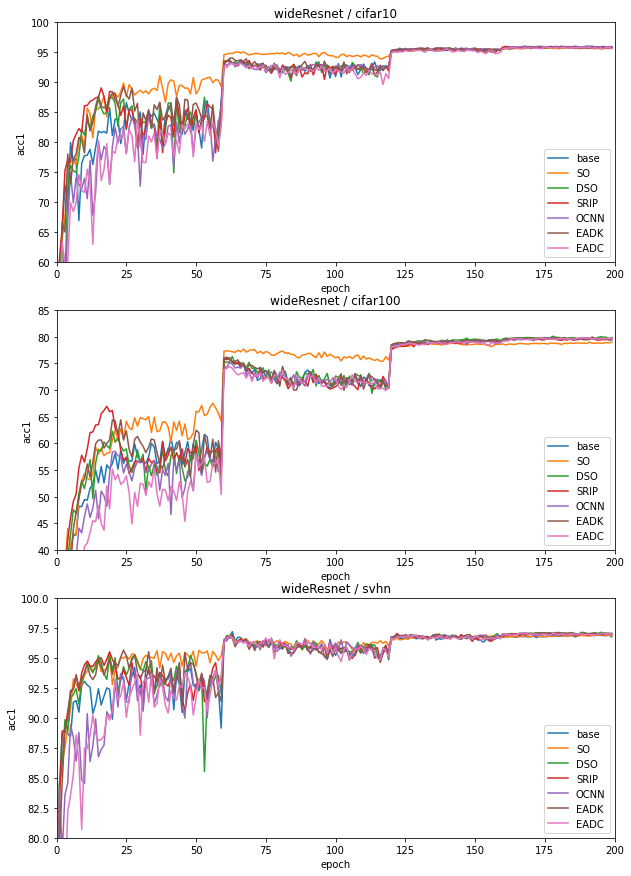

In [19]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))
for i, comp in enumerate(comparison_case):
    tit = ' / '.join(comp.split('_')[:2])
    axs1 = axs[i]
    axs1.set_title(tit)
    axs1.set_xlim(0, 200)
    if '10_' in comp:
        axs1.set_ylim(60, 100)
    elif '100_' in comp:
        axs1.set_ylim(40, 85)
    elif 'svhn_' in comp:
        axs1.set_ylim(80, 100)
    axs1.set_xlabel('epoch')
    axs1.set_ylabel('acc1')
    for f in results:
        if f.startswith(comp):
            axs1.plot(range(200), results[f]['acc1'], label=f.split('_')[-1])
    axs1.legend(loc=4)
fig.show()

# WideResNet Table

In [ ]:
acc1_dic = {}
acc5_dic = {}
loss_dic = {}
time_dic = {}
for fn in file_list:
    try:
        acc1_dic[fn] = sum(results[fn]['acc1'][-5:])/5
        acc5_dic[fn] = sum(results[fn]['acc5'][-5:])/5
        loss_dic[fn] = sum(results[fn]['loss'][-5:])/5
        time_dic[fn] = sum(results[fn]['time'][10:15])/5
    except:
        pass

In [ ]:
table = "    base & {:.2f}/{:.2f} & {:.2f}/{:.2f}  & {:.2f}/{:.2f}  \\\\\n    SO & {:.2f}/{:.2f} & {:.2f}/{:.2f}  & {:.2f}/{:.2f} \\\\\n    DSO & {:.2f}/{:.2f} & {:.2f}/{:.2f}  & {:.2f}/{:.2f} \\\\\n    SRIP & {:.2f}/{:.2f} & {:.2f}/{:.2f}  & {:.2f}/{:.2f} \\\\\n    OCNN & {:.2f}/{:.2f} & {:.2f}/{:.2f}  & {:.2f}/{:.2f} \\\\\n    ADK & {:.2f}/{:.2f} & {:.2f}/{:.2f}  & {:.2f}/{:.2f} \\\\\n    ADC & {:.2f}/{:.2f} & {:.2f}/{:.2f}  & {:.2f}/{:.2f} \\\\\n"
insert_data = []

for r in ['base', 'SO', 'DSO', 'SRIP', 'OCNN', 'ADK', 'ADC']:
    for d in ['cifar10', 'cifar100', 'svhn']:
        fn = '_'.join(['wideResnet', d, r])
        insert_data.append(acc1_dic[fn])
        insert_data.append(acc5_dic[fn])

table_acc1 = table.format(*insert_data)

In [ ]:
print(table_acc1)

In [ ]:
table = "    base & {:.2f} & {:.2f}  & {:.2f}  \\\\\n    SO & {:.2f} & {:.2f}  & {:.2f}  \\\\\n    DSO & {:.2f} & {:.2f}  & {:.2f}  \\\\\n    SRIP & {:.2f} & {:.2f}  & {:.2f}  \\\\\n    OCNN & {:.2f} & {:.2f}  & {:.2f}  \\\\\n    ADK & {:.2f} & {:.2f}  & {:.2f}  \\\\\n    ADC & {:.2f} & {:.2f}  & {:.2f}  \\\\\n"
insert_data = []

for r in ['base', 'SO', 'DSO', 'SRIP', 'OCNN', 'ADK', 'ADC']:
    for d in ['cifar10', 'cifar100', 'svhn']:
        fn = '_'.join(['wideResnet', d, r])
        insert_data.append(time_dic[fn])

table_time = table.format(*insert_data)

In [ ]:
print(table_time)

In [ ]:
tt0 = [0 if isinstance(t, str) else t for t in insert_data]
tt = np.array(tt0)
tt = tt.reshape(7, 3)
tt

In [ ]:
bt = tt[[0], :]
bt

In [ ]:
tt/bt